**Python Sci-kit Learn: Machine Learning: Logistic Regression - Predicting Next Months Credit Card Default Payments**


<div class="alert alert-block alert-info" style="margin-top: 20px">**Note:** Citation:  Data Source:Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.. Datasource@ http://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients</div>


Created by John Ryan 26th April 2017



__Overview__

Question: How do we predict future Credit card default payments with the measurements provided?

The data set provides many categorical and continous variables that allow for the opportunity to implement Machine Learning models to accurately predict future tranactional habits of customers.

**Process of cleansing and transforming datasets to create a comprehensive data set which captures all possible hypothesis abd produces accurate predictive Models**

**Data Exploration and Preperation**

1.Variable Identification

- Identify ID, Input and Target features

- Identify categorical and numerical features

- Identify columns with missing values

2.Univariate Analysis

3.Bi-variate Analysis

4.Missing values treatment

5.Outlier treatment

**Feature-Engineering**

6.Variable transformation

 - Logarithm
        
 - Square/Cube root
        
 - Binning
 
 - Seasonality effects due to periods
 
 5.Scaling the data i.e standard, min-max
        
 Note: decision tree models generally do not require features to be
 standardized or normalized, nor do they require categorical features to be binary-encoded.
        
 6.Dimensionality reduction does not focus on making predictions. Instead,
  it tries to take a set of input data with a feature dimension D.
  
  - Principal Components Analysis (PCA)
            
  - Singular Value Decomposition (SVD)
            
  - Clustering
   
 7.Variable creation
   
Iterate over last 4 until to refine the model

 8.Feature -Importance
 
Note: Set list of Hypothesis in line with the problem you are trying to solve
Select model for task at hand i.e classification, regression

2. Data Modelling - Build Model

  - Encode Labels for categorical variables - One hot encoder.
    
  - Split data into Training and Test sets.
    
  - First Model Gradient Boosting Machine/Random Forest to create bencemark solution
   create additional models.
    
  - K-fold cross Validation vs predicted score, record error rates
   
3. Evaluate Model Performance Classification;

    - Confusion Matrices
    - Accuracy and prediction error 
    - Precision and Recall
    - ROC curve and AUC
    - The kappa statistic
    - F-Measure
    - KFold -Cross Validation
    - Evaluate Model Performance Regression;
      
Multiple Linear Regression models: Understand how far away our predicted values are from
true values, use metrics taking into account overall deviation; 

- Mean Squared Error
- Root Mean Squared Logged Error 
- Mean Absolute Error(MAE) 
- R-Squared coefficient
    
4 Optimization- Model selection and parameter tuning pipelines

- Logistic Regression and SVM use Stochastic Gradient Decent(SGD)
- Decision Trees - Tuning tree depth and impurity
- Naive Bayes - Changing the lambda parameter for naïve Bayes


In [1]:
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd
# We'll also import seaborn, a Python graphing library
%matplotlib inline
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [2]:
#Import the dataset using csv file 
loandata = pd.read_csv("C:/data/creditcard.csv")

In [3]:
#View the first 10 rows of the dataframe
loandata.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,Female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,Male,graduate school,single,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,Male,graduate school,single,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,Female,university,single,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,Female,high school,married,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,Male,high school,single,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [4]:
loandata.describe()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


**Data Munging, Preprocessing**

**Checking for missing values in the data**

In [5]:
#Data Munging
#Checking for missing values in the data
loandata.apply(lambda x: sum(x.isnull()),axis=0)

ID                              0
LIMIT_BAL                       0
SEX                             0
EDUCATION                     345
MARRIAGE                       54
AGE                             0
PAY_0                           0
PAY_2                           0
PAY_3                           0
PAY_4                           0
PAY_5                           0
PAY_6                           0
BILL_AMT1                       0
BILL_AMT2                       0
BILL_AMT3                       0
BILL_AMT4                       0
BILL_AMT5                       0
BILL_AMT6                       0
PAY_AMT1                        0
PAY_AMT2                        0
PAY_AMT3                        0
PAY_AMT4                        0
PAY_AMT5                        0
PAY_AMT6                        0
default payment next month      0
dtype: int64

In [6]:
#show the combined total number of missing values
print("\nTotal number of NAN missing values: {0}".format((loandata.shape[0] * loandata.shape[1]) - loandata.count().sum()))


Total number of NAN missing values: 399


In [7]:
#Display of the total Education value counts
loandata['EDUCATION'].value_counts()

university         14030
graduate school    10585
high school         4917
others               123
Name: EDUCATION, dtype: int64

In [8]:
#Fill in the NaN values with the most common education type in the data
loandata['EDUCATION'].fillna('university',inplace=True)

In [9]:
#Marriage type counts
loandata['MARRIAGE'].value_counts()

single     15964
married    13659
others       323
Name: MARRIAGE, dtype: int64

In [10]:
#Fill in the NaN values with the most common  type in the data
loandata['MARRIAGE'].fillna('single', inplace=True)

In [11]:
#Checking for missing values in the data after missing value treatment
loandata.apply(lambda x: sum(x.isnull()),axis=0)

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

**Value Counts of the target output variable**

In [12]:
loandata['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

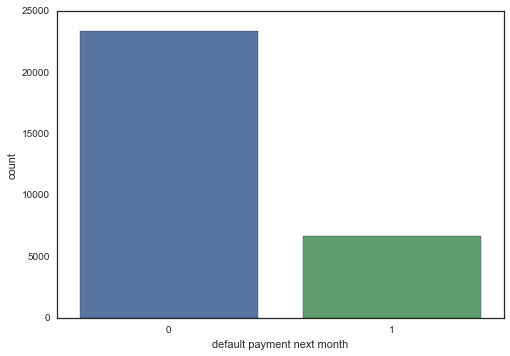

In [13]:
#A look at the target variable using a bar plot
import seaborn as sns
sns.countplot(x="default payment next month", data=loandata)
sns.plt.show()

**Univariate Analysis - Continous Variables**

Analysis of central tendency and spread of the variables.

**Step A: Central Tendency; Mean, Meadian, Mode, Min & Max**
(out of scope for this example)

**Step B: Measures of Dispersion; Range, Quartile, IQR, Variance, Standard Deviation, Skewness and Kurtosis**
(out of scope for this example)

**1. Violin, Swarm Plots**

**2. Boxplots & Outlier Analysis**

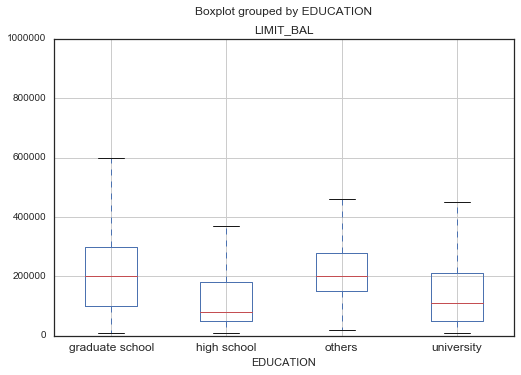

In [14]:
#Boxplot for applicant income sorted by Education type
loandata.boxplot(column='LIMIT_BAL', by = 'EDUCATION')
plt.show()

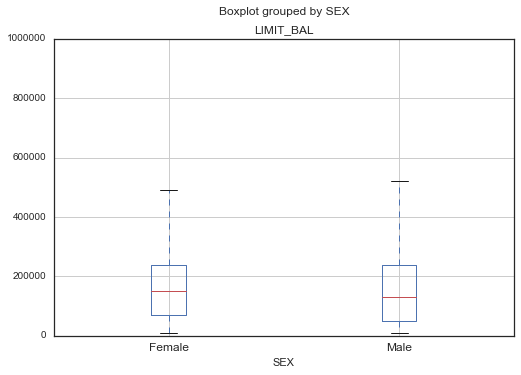

In [15]:
#Boxplot for applicant Income sorted by Gender Type
loandata.boxplot(column='LIMIT_BAL', by = 'SEX')
plt.show()

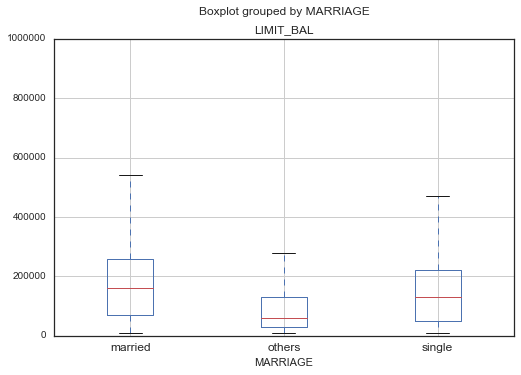

In [16]:
loandata.boxplot(column='LIMIT_BAL', by = 'MARRIAGE')
plt.show()

**3.Histograms**

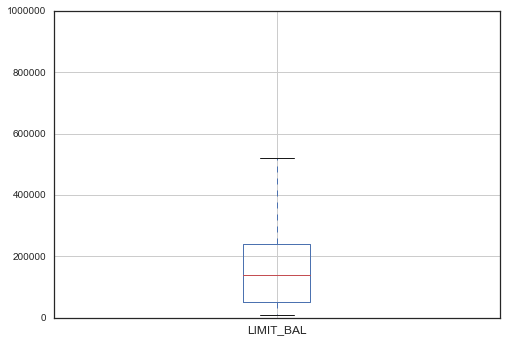

In [21]:
#Boxplot for Loan Amounts Issued to Applicants
loandata.boxplot(column='LIMIT_BAL')
plt.show()

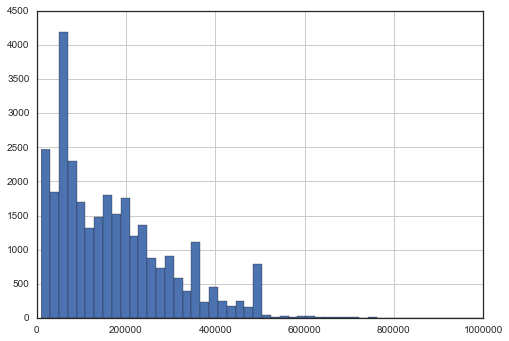

In [17]:
#Limit Balance Histogram
loandata['LIMIT_BAL'].hist(bins = 50)
plt.show()

**Transforming the data to treat outliers (Logging)**

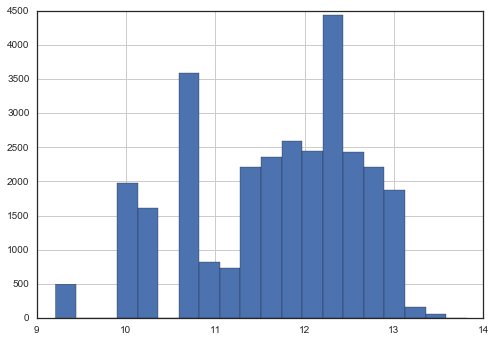

In [20]:
#import numpy library for the computation of np.log and create resulting histogram
import numpy as np
loandata['LIMIT_BAL_log'] = np.log(loandata['LIMIT_BAL'])
loandata['LIMIT_BAL_log'].hist(bins=20)

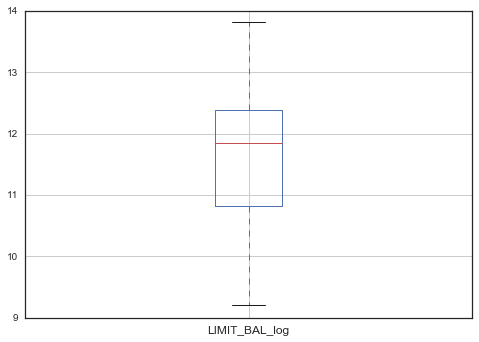

In [23]:
#Boxplot for Loan balances logged results in less outliers and a more balanced distribution
loandata.boxplot(column='LIMIT_BAL_log')
plt.show()

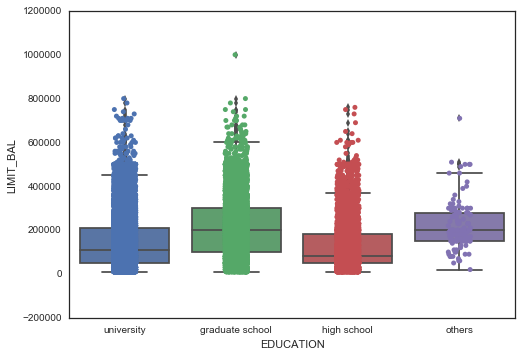

In [22]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
ax = sns.boxplot(x="EDUCATION", y="LIMIT_BAL", data=loandata)
ax = sns.stripplot(x="EDUCATION", y="LIMIT_BAL", data=loandata, jitter=True, edgecolor="gray");

**Bi-variate Analysis - Continous Variables**

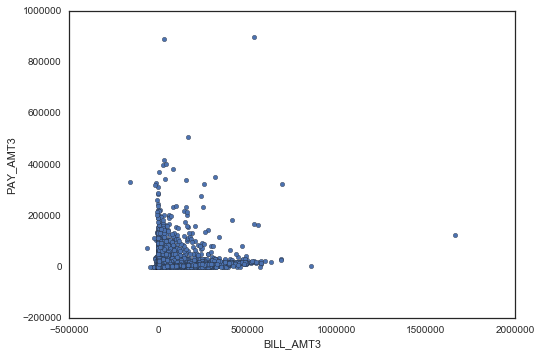

In [24]:
loandata.plot(kind="scatter", x="BILL_AMT3", y="PAY_AMT3");

**Univariate Analysis - Categorical Variables**

Frequency table distribution analysis;


In [30]:
#creating a pivot table to assess the Credit History of Applicants
#Step 1: Create a Frequency Table for Credit History, how many applicants Yes (0.1) vs. No (0.0)
freqtable = loandata['EDUCATION'].value_counts(ascending = True)
freqtable

others               123
high school         4917
graduate school    10585
university         14375
Name: EDUCATION, dtype: int64

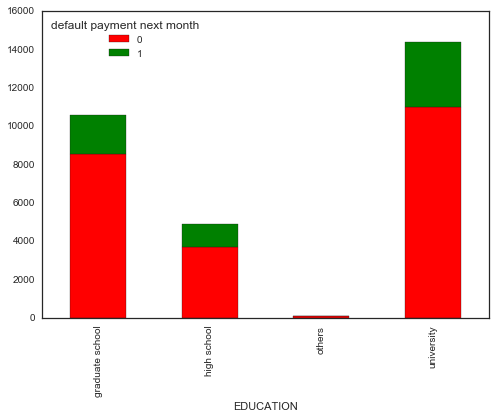

In [31]:
#Stacked Chart by Education Type
stack1 = pd.crosstab(loandata['EDUCATION'], loandata['default payment next month'])
stack1.plot(kind = 'bar', stacked=True, color=['red','green'], grid = False)
plt.show()

In [32]:
#Data Munging
#Checking for missing values in the data
loandata.apply(lambda x: sum(x.isnull()),axis=0)

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
LIMIT_BAL_log                 0
dtype: int64

In [33]:
#show number of missing values
print("\nNumber of NAN missing values : {0}".format((loandata.shape[0] * loandata.shape[1]) - loandata.count().sum()))


Number of NAN missing values : 0


**Building a predictive model: Logistic Regression**

In [34]:
#Label encoder
from sklearn.preprocessing import LabelEncoder

for feature in loandata.columns:
    if loandata[feature].dtype=='object':
        le = LabelEncoder()
        loandata[feature] = le.fit_transform(loandata[feature])
loandata.tail(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,LIMIT_BAL_log
29995,29996,220000,1,1,0,39,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,0,12.301383
29996,29997,150000,1,1,2,43,-1,-1,-1,-1,...,5190,0,1837,3526,8998,129,0,0,0,11.918391
29997,29998,30000,1,3,2,37,4,3,2,-1,...,20582,19357,0,0,22000,4200,2000,3100,1,10.308953
29998,29999,80000,1,1,0,41,1,-1,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,1,11.289782
29999,30000,50000,1,3,0,46,0,0,0,0,...,32428,15313,2078,1800,1430,1000,1000,1000,1,10.819778


In [36]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
  
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
  
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print "Accuracy : %s" % "{0:.3%}".format(accuracy)

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        train_predictors = (data[predictors].iloc[train,:])# Filter training data
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print "Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome]) 

**Create Logistic Regression Model**

In [39]:
#Model 1: Logistic Regression Model - using Education
import numpy as np
outcome_var = 'default payment next month'
model = LogisticRegression()
predictor_var = ['EDUCATION']
classification_model(model,loandata, predictor_var, outcome_var)

Accuracy : 77.880%
Cross-Validation Score : 78.900%


In [40]:
#Model 2: Logistic Regression - using additional variables
predictor_var = ['EDUCATION', 'SEX', 'MARRIAGE']
classification_model(model,loandata, predictor_var, outcome_var)

Accuracy : 77.880%
Cross-Validation Score : 78.900%


Reference: https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-learn-data-science-python-scratch-2/